## Exercício de limpeza de dados que seguem os seguintes parâmetros:
- Tratar dados 'tempo.csv'
- Aparência: sol, nublado, chuva -->
- Temperatura: -135 ~ 130 F
- Umidade: 0 ~ 100
- Jogar: sim/nao
- Tratar valores NAs


In [4]:
import pandas as pd
import seaborn as srn
import statistics  as sts

In [2]:
#importar dados
dataset = pd.read_csv("tempo.csv", sep=";")
#visulizar
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [3]:
#tamanho
dataset.shape

(14, 5)

In [5]:
#explorar dados categoricos
#estado
agrupado = dataset.groupby(['Aparencia']).size()
agrupado


Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

In [45]:
# Retirando o menos
dataset.loc[dataset['Aparencia'] ==  'menos', 'Aparencia'] = "sol"
#visualiza o resultado
agrupado = dataset.groupby(['Aparencia']).size()
agrupado

Aparencia
Sol        1
chuva      5
nublado    3
sol        5
dtype: int64

In [6]:
#explorar dados categoricos
#estado
agrupado = dataset.groupby(['Temperatura']).size()
agrupado

Temperatura
64      1
65      1
68      1
69      1
70      1
71      1
72      1
75      2
80      1
81      1
83      1
85      1
1220    1
dtype: int64

<AxesSubplot:xlabel='Temperatura'>

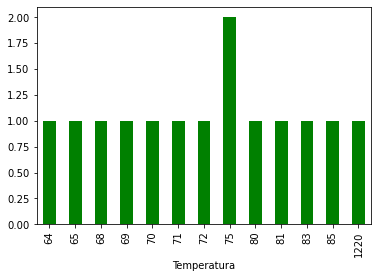

In [7]:
agrupado.plot.bar(color = 'green')

In [36]:
#visualizar 
dataset.loc[(dataset['Temperatura'] <  -130 )  | ( dataset['Temperatura'] >  130) ]

,Aparencia,Temperatura,Umidade,Vento,Jogar
7,sol,1220,95.0,FALSO,nao


In [39]:
#calular a mediana
mediana = sts.median(dataset['Temperatura'])
mediana

73.5

In [43]:
dataset.loc[(dataset['Temperatura'] <  -130 )  | ( dataset['Temperatura'] >  130), 'Temperatura'] = mediana

In [44]:
#verificamos se ainda existem #verificamos se ainda existem idades fora do domínio
dataset.loc[(dataset['Temperatura'] <  -130 )  | ( dataset['Temperatura'] >  130) ]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [37]:
#explorar dados categoricos
#estado
agrupado = dataset.groupby(['Umidade']).size()
agrupado

Umidade
65.0     1
70.0     3
75.0     1
80.0     1
85.0     1
85.5     1
86.0     1
90.0     2
91.0     1
95.0     1
200.0    1
dtype: int64

/home/laiany/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Umidade')

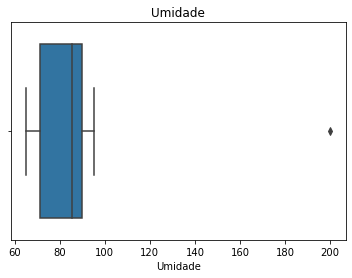

In [38]:
srn.boxplot(dataset['Umidade']).set_title('Umidade')

In [46]:
#visuliza de acordo com o dominio de acordo com o dominio
dataset.loc[(dataset['Umidade'] <  0 )  | ( dataset['Umidade'] >  100) ]

,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,75.0,200.0,85.5,sim


In [47]:
#atualiza comm mediana
dataset.loc[(dataset['Umidade'] <  0 )  | ( dataset['Umidade'] >  100), 'Umidade'] = mediana

In [48]:
#visuliza novamente
dataset.loc[(dataset['Umidade'] <  0 )  | ( dataset['Umidade'] >  100) ]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [49]:
#contamos valores NAN
#umidade e vento

dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        0
Vento          0
Jogar          0
dtype: int64

In [30]:
#retirando Nan da Umidade
dataset['Umidade'].describe()
mediana = sts.median(dataset['Umidade'])
mediana
#substituir NAN por mediana
dataset['Umidade'].fillna(mediana, inplace=True)
#Verificamos se NAN não existem mais
dataset['Umidade'].isnull().sum()


0

In [31]:
#retirando Nan do Vento:
#substituir NAN por mediana
dataset['Vento'].fillna(mediana, inplace=True)
#Verificamos se NAN não existem mais
dataset['Vento'].isnull().sum()


0